In [414]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [415]:
x,y = make_regression(n_samples=4 , n_features=1 , n_informative=1 , n_targets=1 , noise=80 , random_state=13)

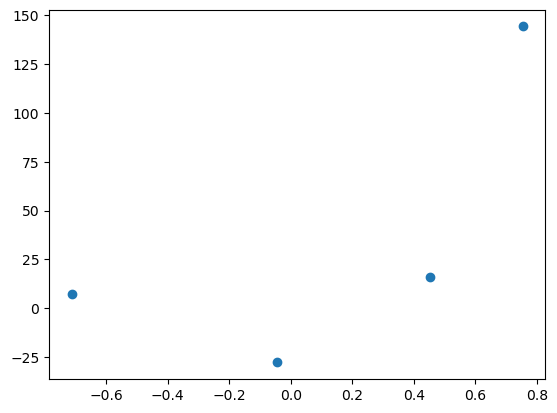

In [416]:
plt.scatter(x,y)

In [417]:
# lets apply ols 
from sklearn.linear_model import LinearRegression

In [418]:
lr = LinearRegression()

In [419]:
lr.fit(x,y)

LinearRegression()

In [420]:
lr.coef_

array([78.35063668])

In [421]:
lr.intercept_

26.15963284313262

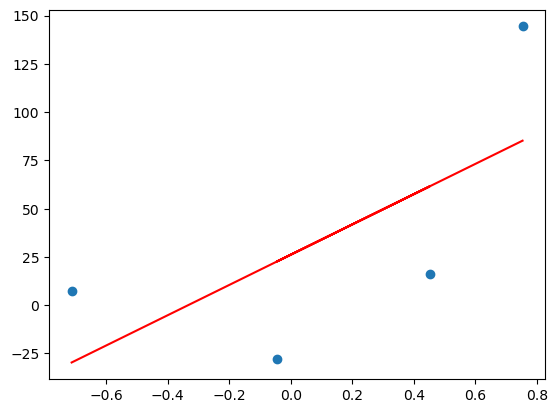

In [422]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red')

In [423]:
# Lets apply Gradiant Descent assuming slope is contant m = 78.35
# and let's assume starting value for intercept b = 0

y_pred = ((78.35 * x) + 0).reshape(4)

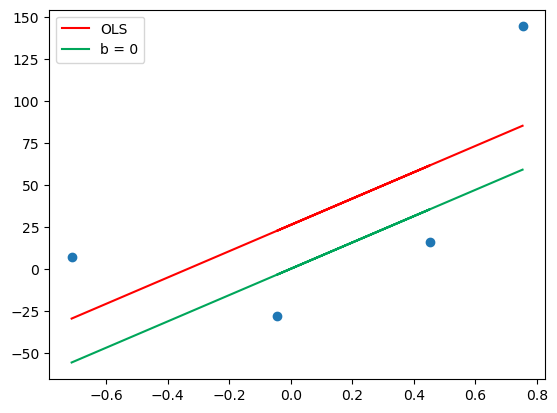

In [424]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red',label='OLS')
plt.plot(x,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

In [425]:
m = 78.35
b = 0

# Iteration 1

loss_slope = -2 * np.sum(y - m*x.ravel() - b)
loss_slope

-209.27763408209216

In [426]:
# lets take learning rate 0.1

l_rate = 0.1

step_size = loss_slope * l_rate
step_size

-20.927763408209216

In [427]:
# Calculating the new intercept

b = b - step_size
b

20.927763408209216

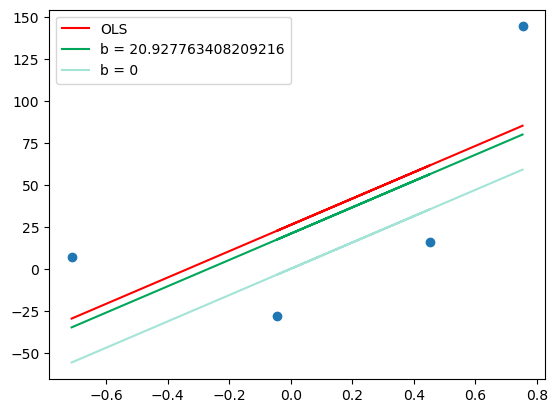

In [428]:
y_pred1 = ((78.35 * x) + b).reshape(4)

plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red',label='OLS')
plt.plot(x,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(x,y_pred,color='#A3E4D7',label = 'b = 0')
plt.legend()
plt.show()

In [429]:
# Iteration 2

loss_slope = -2 * np.sum(y - m*x.ravel() - b)
loss_slope

-41.85552681641843

In [430]:
step_size = loss_slope * l_rate
step_size

-4.185552681641844

In [431]:
b = b - step_size
b

25.11331608985106

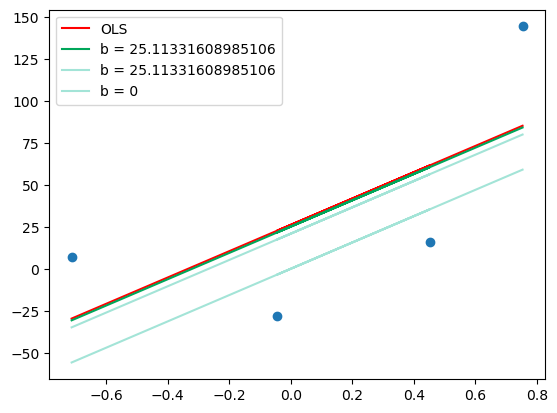

In [432]:
y_pred2 = ((78.35 * x) + b).reshape(4)

plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red',label='OLS')
plt.plot(x,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(x,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(x,y_pred,color='#A3E4D7',label = 'b = 0')
plt.legend()
plt.show()

In [433]:
# iteration 3

loss_slope = -2 * np.sum(y - m*x.ravel() - b)
loss_slope

-8.371105363283675

In [434]:
step_size = loss_slope * l_rate
step_size

-0.8371105363283675

In [435]:
b = b - step_size
b

25.95042662617943

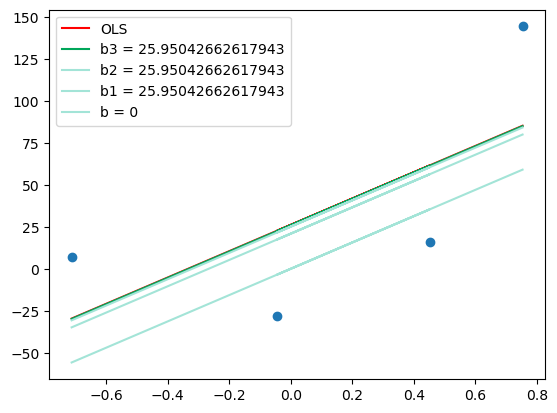

In [436]:
y_pred3 = ((78.35 * x) + b).reshape(4)

plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red',label='OLS')
plt.plot(x,y_pred3,color='#00a65a',label='b3 = {}'.format(b))
plt.plot(x,y_pred2,color='#A3E4D7',label='b2 = {}'.format(b))
plt.plot(x,y_pred1,color='#A3E4D7',label='b1 = {}'.format(b))
plt.plot(x,y_pred,color='#A3E4D7',label = 'b = 0')
plt.legend()
plt.show()

In [437]:
# Lets do with loop ""

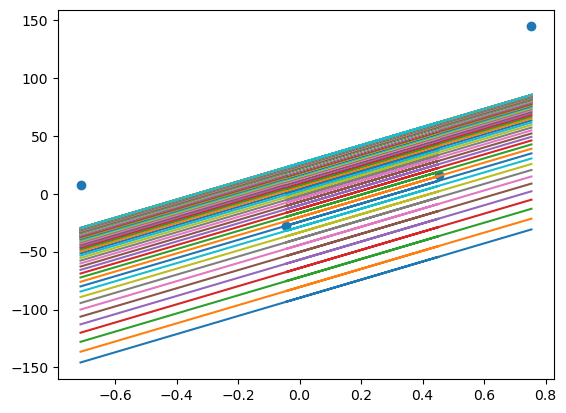

In [438]:
b= -100
m = 78.35
l_rate = 0.01

epochs = 100

for i in range(epochs):
    loss_slope = -2 * np.sum(y - m * x.ravel() - b)
    b = b - (l_rate * loss_slope)
    
    y_pred = m * x + b
    
    plt.plot(x,y_pred)
    
plt.scatter(x,y)

In [439]:
# Lets make our own class 

In [440]:
class GD_Regressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 78.350
        self.b = 26.159
        self.l_rate = learning_rate
        self.epochs = epochs 
        
    def fit(self,x,y):
        # calculating the b using GD
        for i in range(self.epochs):
            loss_slope = -2 * np.sum(y - m * x.ravel() - b)
            self.b = self.b - (l_rate * loss_slope)
            
        print(self.b)

In [441]:
gd = GD_Regressor(0.001,100)

In [442]:
gd.fit(x,y)

26.40043119489821


### lets take same data where m and b is not define 

In [443]:
from sklearn.model_selection import cross_val_score

In [449]:
x,y = make_regression(n_samples=100 , n_features=1 , n_informative=1 , n_targets=1 , noise=20 , random_state=13)

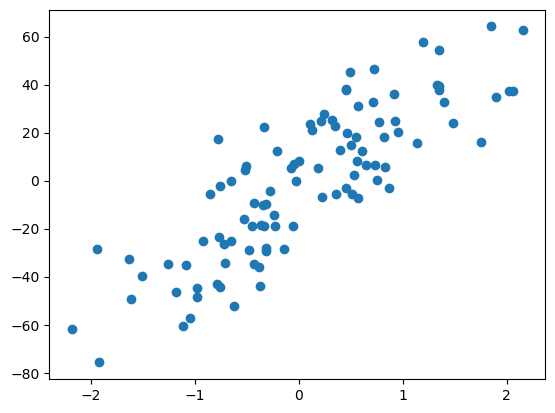

In [450]:
plt.scatter(x_,y_)

In [451]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [452]:
lr = LinearRegression()

In [453]:
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783816


In [454]:
y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.6345158782661013

In [456]:
class GD_Regressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 90                                 # Provide any value
        self.b = -30                                # Provide any value
        self.l_rate = learning_rate
        self.epochs = epochs 
        
    def fit(self,x,y):
        # calculating the b & m using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m * x.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m * x.ravel() - self.b)*x.ravel())
            self.b = self.b - (self.l_rate * loss_slope_b)
            self.m = self.m - (self.l_rate * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,x):
        return self.m * x + self.b

In [457]:
gd = GD_Regressor(0.001,100)             

In [458]:
gd.fit(x_train,y_train)

28.125980691298192 -2.27101879979607


In [459]:
y_pred = gd.predict(x_test)
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.6345158481930073

End